In [12]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [24]:
df_data = pd.read_csv('final_dataset_accident.csv')

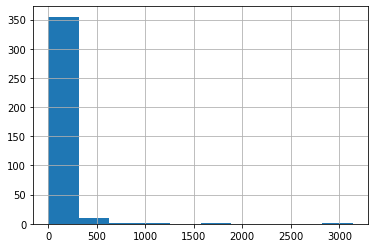

In [25]:
hist = df_data['predicted_text'].hist()

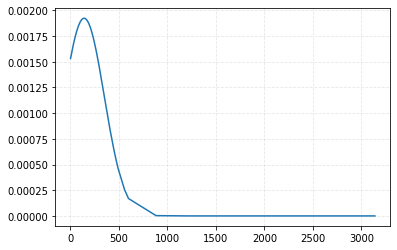

<Figure size 288x576 with 0 Axes>

In [22]:
#Generating data frame
# x = np.random.normal(50, 3, 1000)
source = {"Genotype": ["CV1"]*1000, "AGW": x}
df = pd.DataFrame(source)

# Calculating mean and Stdev of AGW
df_mean = np.mean(df_data['predicted_text'])
df_std = np.std(df_data['predicted_text'])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_data['predicted_text'].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df_data['predicted_text'].sort_values(), pdf)

# plt.xlim([30,70])  
# plt.xlabel("Grain weight (mg)", size=12)    
# plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.figure(figsize=(4, 8))
plt.show()

In [11]:
df_numpy=df_data['predicted_text'].to_numpy(dtype ='float32')


x_data=df_numpy

# hist, bin_edges = np.histogram(x_data)
# hist=hist/sum(hist)

# n = len(x_data)
# x_hist=np.zeros((n),dtype=float) 
# for ii in range(n):
#     x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    
# y_hist=hist

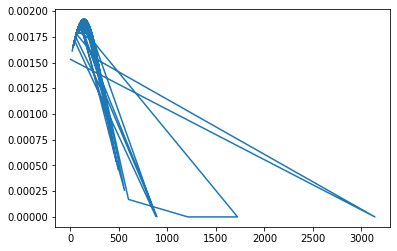

In [15]:
# mean = statistics.mean(x_data)
# sd = statistics.stdev(x_data)
  
plt.plot(x_data, norm.pdf(x_data, 142.87, 207.622))
plt.show()

In [7]:
def gaus(X,C,X_mean,sigma):
    return C*exp(-(X-X_mean)**2/(2*sigma**2))

In [8]:
mean = sum(x_hist*y_hist)/sum(y_hist)                  
sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

In [9]:
mean

186.07459811648812

In [ ]:

df_data = pd.read_csv(folder_path, sep="\t", header=None)

#Covert Panda dataframe to numpy

       
#Calculating the Gaussian PDF values given Gaussian parameters and random variable X


mean = sum(x_hist*y_hist)/sum(y_hist)                  
sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

#Gaussian least-square fitting process
param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

#print fit Gaussian parameters
print("Fit parameters: ")
print("=====================================================")
print("C = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
print("X_mean =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
print("sigma = ", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))
print("\n")


#STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r.:',label='Gaussian fit')
plt.legend()

#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights)

#setting the label,title and grid of the plot
plt.xlabel("Data: Random variable")
plt.ylabel("Probability")
plt.grid("on")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_13816\1308901639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.normal(size=1000), hist=False)


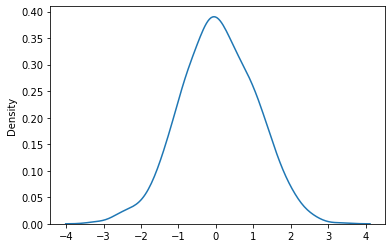

In [9]:
sns.distplot(random.normal(size=), hist=False)
plt.show()